# X1 Data Set

In [30]:
import lxml.etree as etree
import json
import re
import pathlib

import pandas

regex = re.compile("JSON.parse\((.*)\)")
coches = []

for file in (pathlib.Path.cwd()/"X1").rglob("*.html"):
    doc = etree.parse(file, etree.HTMLParser())

    script = doc.xpath("""//script[contains(text(), "__INITIAL_PROPS__")]""")

    if not script:
        print("Skipping:", file)
        continue

    result = regex.search(script[0].text)
    result = result.group(1)
    result = eval(result)

    result = json.loads(result)


    for r in result["initialResults"]["items"]:
        for k in "photos","img","imgUrl":
            r.pop(k, None)
        coches.append(r)

frame = pandas.DataFrame(coches)

frame.describe()


,bodyTypeId,financedPrice,fuelTypeId,km,price,provinceId,specificFuelTypeId,taxTypeId,warrantyId,warrantyMonths,year
count,1190.000000,913.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1150.000000,1140.000000,1205.000000
mean,5.130252,23911.166484,1.163485,89883.300415,25884.116183,26.811618,1.163485,1.023237,2.426087,14.694737,2017.061411
std,1.896127,6353.600245,0.571175,56244.247573,7777.969976,14.049753,0.571175,0.150716,0.851568,5.291981,2.740652
min,1.000000,7899.000000,1.000000,1.000000,8499.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2009.000000
25%,6.000000,20900.000000,1.000000,48569.000000,21995.000000,15.000000,1.000000,1.000000,2.000000,12.000000,2016.000000
50%,6.000000,23999.000000,1.000000,85000.000000,25990.000000,28.000000,1.000000,1.000000,2.000000,12.000000,2018.000000
75%,6.000000,26950.000000,1.000000,116000.000000,29500.000000,39.000000,1.000000,1.000000,2.000000,12.000000,2019.000000
max,6.000000,44400.000000,5.000000,333080.000000,84500.000000,50.000000,5.000000,2.000000,5.000000,36.000000,2022.000000


<AxesSubplot:xlabel='km', ylabel='price'>

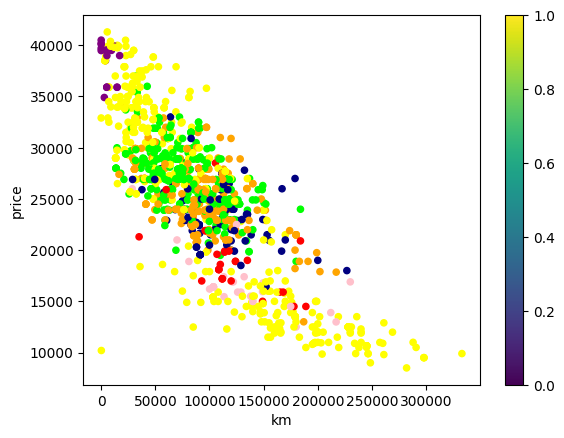

In [31]:
from operator import contains
import matplotlib.pyplot
from collections import defaultdict

pred = frame.price<frame.price.mean()+2*frame.price.std()

c = defaultdict(lambda : "yellow")
c.update({2014: "pink", 2015: "red", 2016: "navy", 2017: "orange", 2018: "lime", 2022: "purple"}) 
frame[pred].plot.scatter(x="km", y="price", c=[c[f] for f in frame[pred].year], colorbar=True)
# frame[pred].plot.scatter(x="km", y="price", c="year", colormap="tab20_r")



/var/folders/9d/mtt6sjs52411qc7hsbr02b400000gn/T/ipykernel_1149/2954065478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame[frame.title.str.contains("sDrive18d")][frame.provinceId==28].plot.scatter("km","price")


<AxesSubplot:xlabel='km', ylabel='price'>

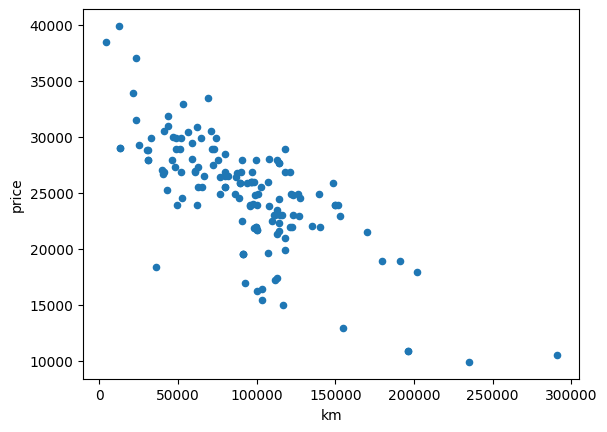

In [35]:
frame[frame.title.str.contains("sDrive18d")][frame.provinceId==28].plot.scatter("km","price")
